**Nome:** Iran Freitas Ribeiro

**Matrícula:** 2021241588

**Disciplina:** TEI - Estatística Aplicada

**Professor:** Celso José Munaro

In [81]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import statsmodels.api as sm
from statsmodels.tsa.stattools import OLS, ccf

In [14]:
# x, y
Z = pd.read_csv("Data_epc10.csv", sep=";", header=None)
Z = Z.values
Ztreino_R = Z[:300]
ZCC_treino = Z[300:600]
ZCC_normal = Z[600:1200]
ZCC_falha = Z[1200:]

In [21]:
Ztreino_R

dtype('float64')

# Questão 1

In [36]:
X1 = Ztreino_R[:, 0]
Y1 = Ztreino_R[:, 1]

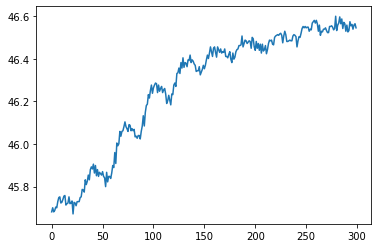

In [52]:
plt.plot(X1)

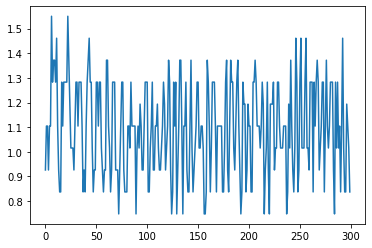

In [53]:
plt.plot(Y1)

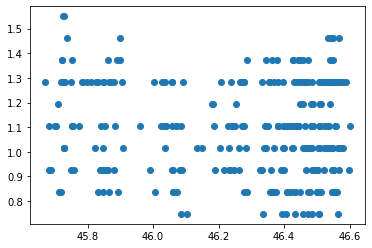

In [51]:
plt.scatter(X1, Y1)

In [37]:
Xr = sm.add_constant(X1)
m1 = OLS(Y1, Xr)
res1 = m1.fit()

In [59]:
res1.params

array([ 3.8133477 , -0.05875932])

In [60]:
b0, b1 = res1.params

In [61]:
b0

3.813347696735804

In [67]:
y_hat = [(b0 + b1*xi) for xi in X1]

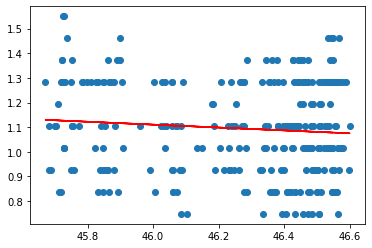

In [69]:
plt.scatter(X1, Y1)
plt.plot(X1, y_hat, c='red')

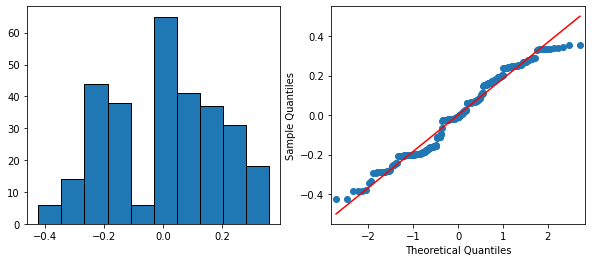

In [80]:
residuos = [yi_h - yi for yi_h,yi in zip(y_hat,Y1)]
fig, ax = plt.subplots(figsize=(10,4),ncols=2)
ax[0].hist(residuos, edgecolor='black')
sm.qqplot(np.array(residuos), ax=ax[1], line="s")
plt.show()

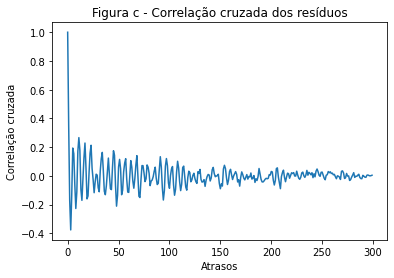

In [82]:
crus_corr = ccf(residuos,residuos, adjusted=False)
fig, ax = plt.subplots()
ax.plot(crus_corr)
ax.set_ylabel("Correlação cruzada")
ax.set_xlabel("Atrasos")
plt.title("Figura c - Correlação cruzada dos resíduos");